In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
House = pd.read_csv('Book1.csv')
House.head()

,area,rooms,BuiltYear,RemodelYear,TotalbsmtSF,SalePrice
0,8450,5,2003,2020,56,500000
1,11250,8,1976,2002,23,1000000
2,9550,5,2001,2020,56,400000
3,14260,5,1915,2018,25,700000
4,14115,5,2000,2022,41,900000


In [10]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   area         15 non-null     int64
 1   rooms        15 non-null     int64
 2   BuiltYear    15 non-null     int64
 3   RemodelYear  15 non-null     int64
 4   TotalbsmtSF  15 non-null     int64
 5   SalePrice    15 non-null     int64
dtypes: int64(6)
memory usage: 848.0 bytes


In [11]:
House.describe()

,area,rooms,BuiltYear,RemodelYear,TotalbsmtSF,SalePrice
count,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,10361.000000,5.600000,1978.200000,2014.666667,23.600000,2.513333e+06
std,2527.477483,1.055597,30.083693,7.612646,16.706714,4.108157e+06
min,6120.000000,5.000000,1915.000000,2002.000000,1.000000,4.000000e+05
25%,9000.000000,5.000000,1963.500000,2007.500000,13.000000,7.500000e+05
50%,10652.000000,5.000000,1993.000000,2018.000000,21.000000,1.000000e+06
75%,11587.000000,6.000000,2003.000000,2020.000000,28.500000,1.400000e+06
max,14260.000000,8.000000,2005.000000,2023.000000,56.000000,1.400000e+07


In [13]:
House.columns

Index(['area', 'rooms', 'BuiltYear', 'RemodelYear', 'TotalbsmtSF',
       'SalePrice'],
      dtype='object')

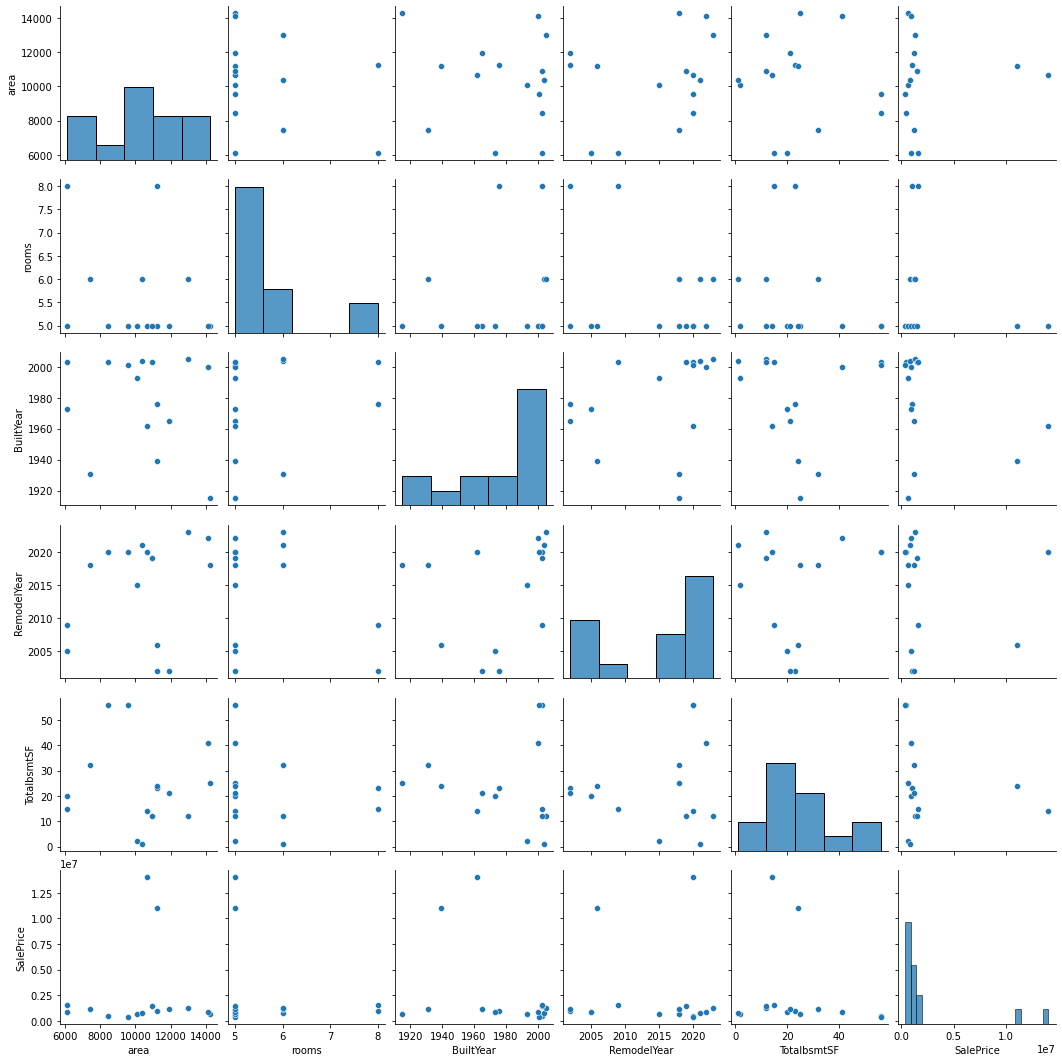

In [14]:
sns.pairplot(House)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

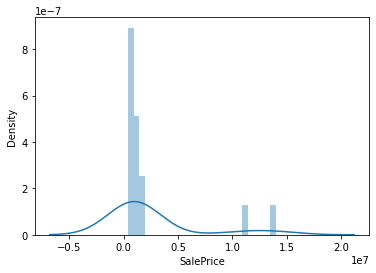

In [16]:
sns.distplot(House['SalePrice'])

<AxesSubplot:>

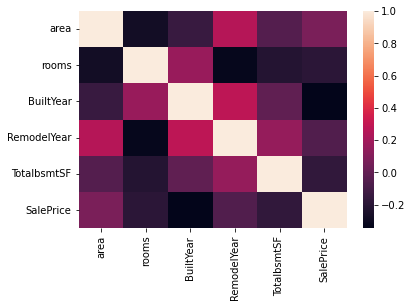

In [21]:
sns.heatmap(House.corr())

In [31]:
x=House[['area', 'rooms', 'BuiltYear', 'RemodelYear', 'TotalbsmtSF']]
y=House['SalePrice']

In [32]:
from sklearn.model_selection import train_test_split 

## 40 percent training and 60 percent testing

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=101)
x_train


,area,rooms,BuiltYear,RemodelYear,TotalbsmtSF
0,8450,5,2003,2020,56
14,6120,8,2003,2009,15
4,14115,5,2000,2022,41
8,7420,6,1931,2018,32
9,11200,5,1939,2006,24
7,6120,5,1973,2005,20
6,10382,6,2004,2021,1
1,11250,8,1976,2002,23
11,12968,6,2005,2023,12


In [37]:
x_test

,area,rooms,BuiltYear,RemodelYear,TotalbsmtSF
13,10920,5,2003,2019,12
2,9550,5,2001,2020,56
3,14260,5,1915,2018,25
12,10652,5,1962,2020,14
10,11924,5,1965,2002,21
5,10084,5,1993,2015,2


In [38]:
y_train

0       500000
14     1600000
4       900000
8      1200000
9     11000000
7       900000
6       800000
1      1000000
11     1300000
Name: SalePrice, dtype: int64

In [39]:
y_test

13     1500000
2       400000
3       700000
12    14000000
10     1200000
5       700000
Name: SalePrice, dtype: int64

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [46]:
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
area,407.594310
rooms,-993346.543181
BuiltYear,-46595.774091
RemodelYear,-176861.112946
TotalbsmtSF,-37510.077369


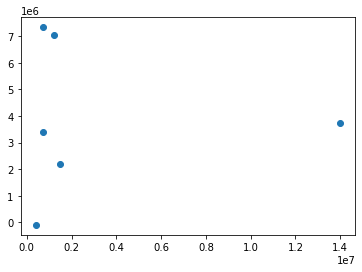

In [49]:
predictions=lm.predict(x_test)
plt.scatter(y_test,predictions)

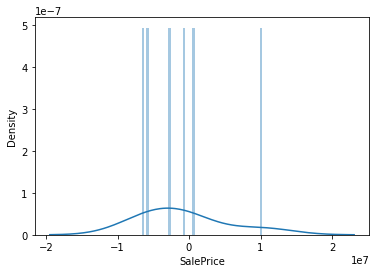

In [54]:
sns.distplot((y_test-predictions),bins=50);